# Clustering Project

Introduction
explanation.........


### 1 - Load and transformation

In [46]:
# Libraries import
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['marketing_campaign.csv']),sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.dtypes # verificando o tipo de variável das colunas

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

O tipo de dado da coluna Dt_customer está errado. Ele tem Object quando deveria ser data

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
df['age'] = 2020 - df['Year_Birth']

In [9]:
# Missing values
null_percent = df.isnull().mean() * 100
print(null_percent)


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
age                    0.000000
dtype: float64


In [10]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,37
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,34
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,61
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,69
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,38
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,47
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,63
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,63
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,47
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,59


In [11]:
df2 = df.copy()
df2 = df2[df2['Income'].notnull()]
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64


In [12]:
# Missing values
null_percent = df2.isnull().mean() * 100
null_percent


ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
age                    0.0
dtype: float64

<Axes: xlabel='age'>

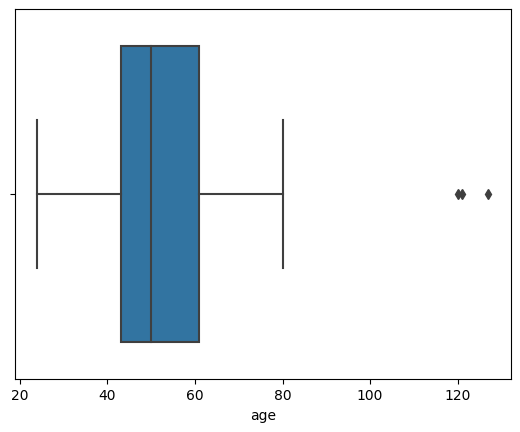

In [13]:
sns.boxplot(x=df2['age'])

In [14]:
df2_numeric = df2.select_dtypes(include='number').drop(['ID'], axis=1) #detecta automatic as colunas numéricas

# Select the categorical columns and the 'ID' column from the original DataFrame
df2_categorical = df2.select_dtypes(exclude='number').join(df2['ID'])


In [15]:
df2_numeric.shape

(2216, 26)

In [16]:
df2_categorical.shape

(2216, 4)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Year_Birth'),
  Text(1, 0, 'Income'),
  Text(2, 0, 'Kidhome'),
  Text(3, 0, 'Teenhome'),
  Text(4, 0, 'Recency'),
  Text(5, 0, 'MntWines'),
  Text(6, 0, 'MntFruits'),
  Text(7, 0, 'MntMeatProducts'),
  Text(8, 0, 'MntFishProducts'),
  Text(9, 0, 'MntSweetProducts'),
  Text(10, 0, 'MntGoldProds'),
  Text(11, 0, 'NumDealsPurchases'),
  Text(12, 0, 'NumWebPurchases'),
  Text(13, 0, 'NumCatalogPurchases'),
  Text(14, 0, 'NumStorePurchases'),
  Text(15, 0, 'NumWebVisitsMonth'),
  Text(16, 0, 'AcceptedCmp3'),
  Text(17, 0, 'AcceptedCmp4'),
  Text(18, 0, 'AcceptedCmp5'),
  Text(19, 0, 'AcceptedCmp1'),
  Text(20, 0, 'AcceptedCmp2'),
  Text(21, 0, 'Complain'),
  Text(22, 0, 'Z_CostContact'),
  Text(23, 0, 'Z_Revenue'),
  Text(24, 0, 'Response'),
  Text(25, 0, 'age')])

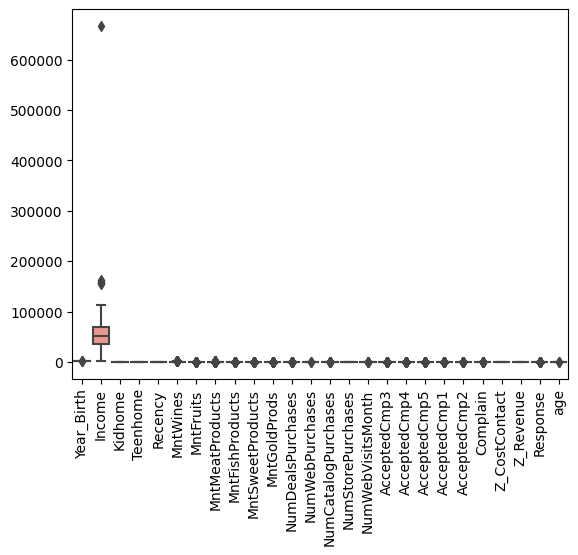

In [17]:
sns.boxplot(data=df2_numeric)
plt.xticks(rotation=90)

In [18]:
# Define a function to remove outliers from a given column
def remove_outliers(column):
    # Calculate the IQR of the column
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the column
    column_no_outliers = column[(column >= lower_bound) & (column <= upper_bound)]

    return column_no_outliers

# Apply the remove_outliers function to all numeric columns in the DataFrame
df2_clean = df2_numeric.apply(lambda x: remove_outliers(x) if np.issubdtype(x.dtype, np.number) else x)
df2_clean

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,1957.0,58138.0,0,0,58,635.0,NaN,546.0,NaN,NaN,88.0,3.0,8.0,10.0,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,NaN,63.0
1,1954.0,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,66.0
2,1965.0,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,55.0
3,1984.0,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,36.0
4,1981.0,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967.0,61223.0,0,1,46,709.0,43.0,182.0,42.0,NaN,NaN,2.0,9.0,3.0,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,53.0
2236,1946.0,64014.0,2,1,56,406.0,0.0,30.0,0.0,0.0,8.0,NaN,8.0,2.0,5,7.0,0.0,0.0,0.0,NaN,0.0,0.0,3,11,0.0,74.0
2237,1981.0,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13,6.0,0.0,NaN,0.0,0.0,0.0,0.0,3,11,0.0,39.0
2238,1956.0,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,64.0


In [19]:
# Concatenate the cleaned numeric columns with the categorical columns and the 'ID' column
df3_clean = pd.concat([df2_clean, df2_categorical], axis=1)

In [20]:
df2_clean.shape

(2216, 26)

In [21]:
df3_clean.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Education,Marital_Status,Dt_Customer,ID
0,1957.0,58138.0,0,0,58,635.0,NaN,546.0,NaN,NaN,88.0,3.0,8.0,10.0,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,NaN,63.0,Graduation,Single,2012-09-04,5524
1,1954.0,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,66.0,Graduation,Single,2014-03-08,2174
2,1965.0,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,55.0,Graduation,Together,2013-08-21,4141
3,1984.0,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,36.0,Graduation,Together,2014-02-10,6182
4,1981.0,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,39.0,PhD,Married,2014-01-19,5324


In [22]:
df4_clean = df3_clean.copy()
df4_clean = df4_clean.dropna()
df4_clean.shape

(1182, 30)

In [36]:
df4_clean

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Education,Marital_Status,Dt_Customer,ID
1,1954.0,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,66.0,Graduation,Single,2014-03-08,2174
2,1965.0,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,55.0,Graduation,Together,2013-08-21,4141
3,1984.0,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,36.0,Graduation,Together,2014-02-10,6182
4,1981.0,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,39.0,PhD,Married,2014-01-19,5324
5,1967.0,62513.0,0,1,16,520.0,42.0,98.0,0.0,42.0,14.0,2.0,6.0,4.0,10,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,53.0,Master,Together,2013-09-09,7446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,1972.0,24434.0,2,0,9,3.0,2.0,8.0,20.0,0.0,17.0,2.0,2.0,1.0,2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,48.0,Graduation,Married,2014-05-18,10084
2231,1970.0,44802.0,0,0,71,853.0,10.0,143.0,13.0,10.0,20.0,2.0,9.0,4.0,12,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,50.0,Master,Single,2012-08-21,9817
2232,1986.0,26816.0,0,0,50,5.0,1.0,6.0,3.0,4.0,3.0,1.0,0.0,0.0,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,34.0,Graduation,Single,2012-08-17,8080
2234,1974.0,34421.0,1,0,81,3.0,3.0,7.0,6.0,2.0,9.0,1.0,1.0,0.0,2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,46.0,Graduation,Married,2013-07-01,8372


In [23]:
# Select only the numeric columns from the DataFrame, excluding the 'ID' column
df4_numeric = df4_clean.select_dtypes(include='number').drop('ID', axis=1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns and transform the data
df4_normalized = pd.DataFrame(scaler.fit_transform(df4_numeric), columns=df4_numeric.columns)

# Add the 'ID' column back to the normalized DataFrame
df4_normalized['ID'] = df4_clean['ID'].values

In [37]:
df4_normalized

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,ID
0,0.254545,0.506323,0.5,0.5,0.383838,0.009574,0.012987,0.011111,0.016667,0.012346,0.047619,0.333333,0.090909,0.1,0.153846,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.745455,2174
1,0.454545,0.818082,0.0,0.0,0.262626,0.370757,0.636364,0.235185,0.925000,0.259259,0.333333,0.166667,0.727273,0.2,0.769231,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,4141
2,0.800000,0.263297,0.5,0.0,0.262626,0.009574,0.051948,0.037037,0.083333,0.037037,0.039683,0.333333,0.181818,0.0,0.307692,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,6182
3,0.745455,0.653745,0.5,0.0,0.949495,0.150566,0.558442,0.218519,0.383333,0.333333,0.119048,0.833333,0.454545,0.3,0.461538,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254545,5324
4,0.490909,0.705810,0.0,0.5,0.161616,0.452567,0.545455,0.181481,0.000000,0.518519,0.111111,0.333333,0.545455,0.4,0.769231,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509091,7446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0.581818,0.236006,1.0,0.0,0.090909,0.002611,0.025974,0.014815,0.166667,0.000000,0.134921,0.333333,0.181818,0.1,0.153846,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418182,10084
1178,0.545455,0.487298,0.0,0.0,0.717172,0.742385,0.129870,0.264815,0.108333,0.123457,0.158730,0.333333,0.818182,0.4,0.923077,0.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,9817
1179,0.836364,0.265394,0.0,0.0,0.505051,0.004352,0.012987,0.011111,0.025000,0.049383,0.023810,0.166667,0.000000,0.0,0.230769,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163636,8080
1180,0.618182,0.359222,0.5,0.0,0.818182,0.002611,0.038961,0.012963,0.050000,0.024691,0.071429,0.166667,0.090909,0.0,0.153846,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.381818,8372


In [39]:
# Select the non-numeric columns from the original DataFrame
df4_non_numeric = df4_clean.select_dtypes(exclude='number')

# Concatenate the normalized numeric columns with the non-numeric columns
df4_complete = pd.concat([df4_normalized, df4_non_numeric], axis=1)

# Elimine as linhas onde a coluna "income" é NaN
df4_complete = df4_complete.dropna(subset=['Income'])

In [40]:
df4_complete

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,ID,Education,Marital_Status,Dt_Customer
0,0.254545,0.506323,0.5,0.5,0.383838,0.009574,0.012987,0.011111,0.016667,0.012346,0.047619,0.333333,0.090909,0.1,0.153846,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.745455,2174.0,NaN,NaN,NaT
1,0.454545,0.818082,0.0,0.0,0.262626,0.370757,0.636364,0.235185,0.925000,0.259259,0.333333,0.166667,0.727273,0.2,0.769231,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,4141.0,Graduation,Single,2014-03-08
2,0.800000,0.263297,0.5,0.0,0.262626,0.009574,0.051948,0.037037,0.083333,0.037037,0.039683,0.333333,0.181818,0.0,0.307692,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,6182.0,Graduation,Together,2013-08-21
3,0.745455,0.653745,0.5,0.0,0.949495,0.150566,0.558442,0.218519,0.383333,0.333333,0.119048,0.833333,0.454545,0.3,0.461538,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254545,5324.0,Graduation,Together,2014-02-10
4,0.490909,0.705810,0.0,0.5,0.161616,0.452567,0.545455,0.181481,0.000000,0.518519,0.111111,0.333333,0.545455,0.4,0.769231,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509091,7446.0,PhD,Married,2014-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0.581818,0.236006,1.0,0.0,0.090909,0.002611,0.025974,0.014815,0.166667,0.000000,0.134921,0.333333,0.181818,0.1,0.153846,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418182,10084.0,Graduation,Married,2013-05-17
1178,0.545455,0.487298,0.0,0.0,0.717172,0.742385,0.129870,0.264815,0.108333,0.123457,0.158730,0.333333,0.818182,0.4,0.923077,0.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,9817.0,Graduation,Divorced,2013-04-13
1179,0.836364,0.265394,0.0,0.0,0.505051,0.004352,0.012987,0.011111,0.025000,0.049383,0.023810,0.166667,0.000000,0.0,0.230769,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163636,8080.0,NaN,NaN,NaT
1180,0.618182,0.359222,0.5,0.0,0.818182,0.002611,0.038961,0.012963,0.050000,0.024691,0.071429,0.166667,0.090909,0.0,0.153846,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.381818,8372.0,NaN,NaN,NaT


In [41]:
unique_values = df4_complete['Education'].unique()
unique_values

array([nan, 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'],
      dtype=object)

In [42]:
# Calcule o percentual de cada valor na coluna "education", incluindo NaN
education_counts = df4_complete['Education'].value_counts(normalize=True, dropna=False) * 100

# Substitua o rótulo NaN por um rótulo mais legível
education_counts.index = education_counts.index.fillna('NaN')

# Crie uma tabela para visualizar os resultados
education_table = pd.DataFrame({'Educação': education_counts.index, 'Percentual (%)': education_counts.values})
print(education_table)

     Educação  Percentual (%)
0         NaN       46.108291
1  Graduation       25.634518
2         PhD       12.182741
3      Master        9.390863
4    2n Cycle        4.991540
5       Basic        1.692047


In [43]:
# Elimine as linhas onde a coluna "education" é NaN
df5 = df4_complete.copy()
df5 = df5.dropna(subset=['Education'])
df5


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,ID,Education,Marital_Status,Dt_Customer
1,0.454545,0.818082,0.0,0.0,0.262626,0.370757,0.636364,0.235185,0.925000,0.259259,0.333333,0.166667,0.727273,0.2,0.769231,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,4141.0,Graduation,Single,2014-03-08
2,0.800000,0.263297,0.5,0.0,0.262626,0.009574,0.051948,0.037037,0.083333,0.037037,0.039683,0.333333,0.181818,0.0,0.307692,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,6182.0,Graduation,Together,2013-08-21
3,0.745455,0.653745,0.5,0.0,0.949495,0.150566,0.558442,0.218519,0.383333,0.333333,0.119048,0.833333,0.454545,0.3,0.461538,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254545,5324.0,Graduation,Together,2014-02-10
4,0.490909,0.705810,0.0,0.5,0.161616,0.452567,0.545455,0.181481,0.000000,0.518519,0.111111,0.333333,0.545455,0.4,0.769231,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509091,7446.0,PhD,Married,2014-01-19
5,0.563636,0.620952,0.0,0.5,0.343434,0.204526,0.844156,0.303704,0.416667,0.604938,0.214286,0.666667,0.636364,0.3,0.538462,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436364,965.0,Master,Together,2013-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0.509091,0.656965,0.5,0.5,0.555556,0.320279,0.311688,0.125926,0.316667,0.000000,0.698413,1.000000,0.727273,0.2,0.461538,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490909,4749.0,Master,Married,2013-11-13
1176,0.400000,0.649723,0.0,0.5,0.393939,0.199304,0.090909,0.253704,0.033333,0.000000,0.722222,0.833333,0.363636,0.2,0.615385,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,4201.0,Master,Married,2012-11-03
1177,0.581818,0.236006,1.0,0.0,0.090909,0.002611,0.025974,0.014815,0.166667,0.000000,0.134921,0.333333,0.181818,0.1,0.153846,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418182,10084.0,Graduation,Married,2013-05-17
1178,0.545455,0.487298,0.0,0.0,0.717172,0.742385,0.129870,0.264815,0.108333,0.123457,0.158730,0.333333,0.818182,0.4,0.923077,0.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,9817.0,Graduation,Divorced,2013-04-13


In [45]:
# Faça o one-hot encoding da coluna "education"
df_encoded = pd.get_dummies(df5, columns=['Education'])
df_encoded

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,ID,Marital_Status,Dt_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
1,0.454545,0.818082,0.0,0.0,0.262626,0.370757,0.636364,0.235185,0.925000,0.259259,0.333333,0.166667,0.727273,0.2,0.769231,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,4141.0,Single,2014-03-08,0,0,1,0,0
2,0.800000,0.263297,0.5,0.0,0.262626,0.009574,0.051948,0.037037,0.083333,0.037037,0.039683,0.333333,0.181818,0.0,0.307692,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,6182.0,Together,2013-08-21,0,0,1,0,0
3,0.745455,0.653745,0.5,0.0,0.949495,0.150566,0.558442,0.218519,0.383333,0.333333,0.119048,0.833333,0.454545,0.3,0.461538,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254545,5324.0,Together,2014-02-10,0,0,1,0,0
4,0.490909,0.705810,0.0,0.5,0.161616,0.452567,0.545455,0.181481,0.000000,0.518519,0.111111,0.333333,0.545455,0.4,0.769231,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509091,7446.0,Married,2014-01-19,0,0,0,0,1
5,0.563636,0.620952,0.0,0.5,0.343434,0.204526,0.844156,0.303704,0.416667,0.604938,0.214286,0.666667,0.636364,0.3,0.538462,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436364,965.0,Together,2013-09-09,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0.509091,0.656965,0.5,0.5,0.555556,0.320279,0.311688,0.125926,0.316667,0.000000,0.698413,1.000000,0.727273,0.2,0.461538,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490909,4749.0,Married,2013-11-13,0,0,0,1,0
1176,0.400000,0.649723,0.0,0.5,0.393939,0.199304,0.090909,0.253704,0.033333,0.000000,0.722222,0.833333,0.363636,0.2,0.615385,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,4201.0,Married,2012-11-03,0,0,0,1,0
1177,0.581818,0.236006,1.0,0.0,0.090909,0.002611,0.025974,0.014815,0.166667,0.000000,0.134921,0.333333,0.181818,0.1,0.153846,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418182,10084.0,Married,2013-05-17,0,0,1,0,0
1178,0.545455,0.487298,0.0,0.0,0.717172,0.742385,0.129870,0.264815,0.108333,0.123457,0.158730,0.333333,0.818182,0.4,0.923077,0.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,9817.0,Divorced,2013-04-13,0,0,1,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

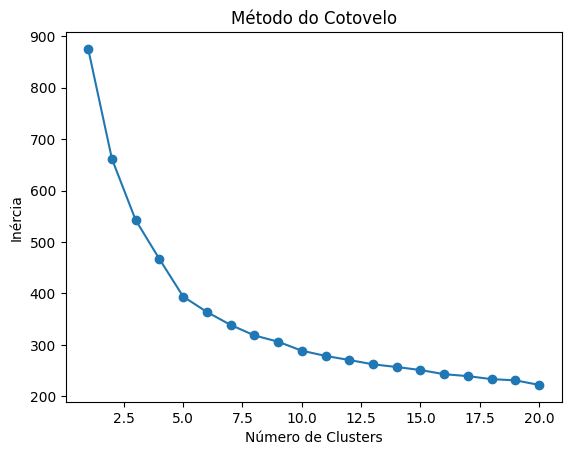

In [49]:
# Selecione as colunas a serem consideradas
cols = [col for col in df_encoded.columns if col not in ['Year_Birth', 'ID', 'Dt_Customer', 'Marital_Status']]
df_scaled = df_encoded[cols]


# Aplique o método do cotovelo
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Crie um gráfico para visualizar os resultados
plt.plot(range(1, 21), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [51]:
# Deixe df4 "clean" com as linhas que correspondem aos IDs que estão em dfscaled
df4_clean = df4_clean[df4_clean['ID'].isin(df_encoded['ID'])]


In [53]:
# Crie uma lista para armazenar os resultados
results = []

# Faça várias segmentações K-means
for k in range(4, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    df4_clean['cluster'] = kmeans.labels_

    # Calcule o número de clientes em cada segmento
    cluster_counts = df4_clean['cluster'].value_counts()

    # Calcule o percentual que representam do total da base
    cluster_percents = cluster_counts / df4_clean.shape[0] * 100

    # Calcule a média de cada variável usada exceto as dummies
    cluster_means = df4_clean.groupby('cluster').mean()

    # Crie um relatório para esta segmentação
    report = pd.concat([cluster_counts, cluster_percents, cluster_means], axis=1)
    report.columns = ['Número de Clientes', 'Percentual (%)'] + list(cluster_means.columns)
    report.index.name = f'Cluster (k={k})'
    report.reset_index(inplace=True)

    # Adicione o relatório à lista de resultados
    results.append(report)

# Concatene todos os relatórios em uma única tabela
final_report = pd.concat(results, axis=0, ignore_index=True)

# Visualize o resultado
final_report

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-53-ca64e5b6a8f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_clean['cluster'] = kmeans.labels_
<ipython-input-53-ca64e5b6a8f4>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df4_clean.groupby('cluster').mean()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: Futur

,Cluster (k=4),Número de Clientes,Percentual (%),Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,ID,Cluster (k=5),Cluster (k=6)
0,1.0,303,47.566719,1968.937294,42737.379538,0.587459,0.574257,51.788779,165.118812,9.636964,72.501650,16.755776,10.640264,22.801980,2.161716,3.260726,1.405941,4.765677,5.851485,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,51.062706,5530.135314,NaN,NaN
1,2.0,144,22.605965,1968.541667,39899.173611,0.625000,0.597222,48.701389,103.618056,7.472222,47.152778,10.493056,8.090278,21.180556,2.180556,2.715278,1.062500,4.187500,5.875000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,51.458333,5457.395833,NaN,NaN
2,0.0,111,17.425432,1970.819820,42481.585586,0.657658,0.486486,48.270270,117.531532,7.558559,54.945946,12.360360,9.117117,23.522523,2.216216,2.855856,1.090090,4.405405,5.675676,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,49.180180,5375.171171,NaN,NaN
3,3.0,79,12.401884,1968.898734,40368.822785,0.658228,0.658228,51.822785,110.873418,9.025316,53.177215,13.556962,8.924051,15.873418,2.240506,2.772152,1.037975,4.278481,5.886076,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,51.101266,5626.607595,NaN,NaN
4,NaN,211,33.124019,1970.928910,34866.654028,0.805687,0.497630,50.919431,41.582938,4.056872,22.734597,6.431280,4.630332,12.341232,1.981043,2.132701,0.450237,3.274882,6.355450,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,49.071090,5540.616114,2.0,NaN
5,NaN,144,22.605965,1968.541667,39899.173611,0.625000,0.597222,48.701389,103.618056,7.472222,47.152778,10.493056,8.090278,21.180556,2.180556,2.715278,1.062500,4.187500,5.875000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,51.458333,5457.395833,1.0,NaN
6,NaN,111,17.425432,1970.819820,42481.585586,0.657658,0.486486,48.270270,117.531532,7.558559,54.945946,12.360360,9.117117,23.522523,2.216216,2.855856,1.090090,4.405405,5.675676,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,49.180180,5375.171171,3.0,NaN
7,NaN,94,14.756672,1964.627660,60987.574468,0.085106,0.755319,53.851064,448.489362,22.861702,190.638298,39.872340,23.904255,46.329787,2.563830,5.861702,3.595745,8.244681,4.670213,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,55.372340,5496.170213,0.0,NaN
8,NaN,77,12.087912,1968.701299,39595.675325,0.675325,0.649351,51.688312,102.051948,8.155844,44.831169,13.545455,9.155844,15.636364,2.246753,2.675325,0.974026,4.103896,5.948052,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,51.298701,5641.857143,4.0,NaN
9,NaN,211,33.124019,1970.928910,34866.654028,0.805687,0.497630,50.919431,41.582938,4.056872,22.734597,6.431280,4.630332,12.341232,1.981043,2.132701,0.450237,3.274882,6.355450,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,49.071090,5540.616114,NaN,2.0


In [58]:
# Crie uma lista para armazenar os resultados
results = []

# Faça várias segmentações K-means
for k in range(4, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    df4_clean['cluster'] = kmeans.labels_

    # Calcule o número de clientes em cada segmento
    cluster_counts = df4_clean['cluster'].value_counts()

    # Calcule o percentual que representam do total da base
    cluster_percents = cluster_counts / df4_clean.shape[0] * 100

    # Calcule a média das variáveis "income" e "age"
    cluster_means = df4_clean.groupby('cluster')[['Income', 'age']].mean()

    # Crie um relatório para esta segmentação
    report = pd.concat([cluster_counts, cluster_percents, cluster_means], axis=1)
    report.columns = ['Número de Clientes', 'Percentual (%)', 'Média de Income', 'Média de Age']
    report.index.name = f'Cluster (k={k})'
    report.reset_index(inplace=True)

    # Adicione o relatório à lista de resultados
    results.append(report)

# Concatene todos os relatórios em uma única tabela
final_report = pd.concat(results, axis=0, ignore_index=True)

# Reorganize o relatório para que o número do cluster esteja na coluna
#final_report = final_report.pivot(index='Cluster (k={k})', columns='index')
#final_report.columns = [f'{col[0]} ({col[1]})' for col in final_report.columns]
#final_report.reset_index(inplace=True)

# Visualize o resultado
final_report

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-58-f56aba2ce0a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_clean['cluster'] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-58-f56aba2ce0a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Cluster (k=4),Número de Clientes,Percentual (%),Média de Income,Média de Age,Cluster (k=5),Cluster (k=6),Cluster (k=7)
0,1.0,303,47.566719,42737.379538,51.062706,NaN,NaN,NaN
1,2.0,144,22.605965,39899.173611,51.458333,NaN,NaN,NaN
2,3.0,111,17.425432,42481.585586,49.180180,NaN,NaN,NaN
3,0.0,79,12.401884,40368.822785,51.101266,NaN,NaN,NaN
4,NaN,211,33.124019,34866.654028,49.071090,0.0,NaN,NaN
5,NaN,144,22.605965,39899.173611,51.458333,1.0,NaN,NaN
6,NaN,111,17.425432,42481.585586,49.180180,2.0,NaN,NaN
7,NaN,94,14.756672,60987.574468,55.372340,3.0,NaN,NaN
8,NaN,77,12.087912,39595.675325,51.298701,4.0,NaN,NaN
9,NaN,209,32.810047,34708.803828,49.086124,NaN,0.0,NaN


In [59]:
# Exporte o relatório final para um arquivo do Excel
final_report.to_excel('final_report.xlsx', index=False)